# Одномерная модель Изинга

In [70]:
import numpy as np
import matplotlib.pyplot as plt

## Гамильтониан
$H = \sum^{N-1}_{i = 0} -J s_i s_{i+1} - hs_i$

С учетом периодических условий: $s_N = s_0$

In [71]:
# Энергия в системе
def energy_ising_1d(configuration: np.array, J: float, h: float) -> float:
    num_spins = len(configuration)
    energy = 0.0
    for i in range(num_spins):
        spini = configuration[i]
        ip1 = (i+1) % num_spins
        spinip1 = configuration[ip1]
        energy = energy - J * (spini * spinip1) - h * spini
    return energy

In [97]:
# Проверка значений энергии в системе
test_num_spins = 10
test_J = 1
test_h = 2

test_config_1 = -1 * np.ones(test_num_spins)
test_config_2 = np.ones(test_num_spins)
test_config_3 = np.ones(test_num_spins)
test_config_3[::2] = -1

tests = [test_config_1, test_config_2, test_config_3]
expected_energy = [
    test_num_spins * (test_h - test_J), 
    -test_num_spins * (test_h + test_J),
    test_num_spins * test_J
]

for i, test in enumerate(tests):
    print(f'Test Config {i+1}: {test}')
    print(f'Energy Config {i+1}: {energy_ising_1d(test, test_J, test_h)}')
    print(f'Expected Energy Config {i+1}: {expected_energy[i]}', end='\n\n')

Test Config 1: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Energy Config 1: 10.0
Expected Energy Config 1: 10

Test Config 2: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Energy Config 2: -30.0
Expected Energy Config 2: -30

Test Config 3: [-1.  1. -1.  1. -1.  1. -1.  1. -1.  1.]
Energy Config 3: 10.0
Expected Energy Config 3: 10



## Алгоритм Метрополиса

In [73]:
random_seed = 1
np.random.seed(random_seed)

def energy_difference(J, h, si, sleft, sright):
    dE = 2 * h * si + 2 * J * si * (sleft + sright)
    return dE

def metropolis_mc(n_steps, n_lattice_sites, beta, J, h, debug=False, save_freq=10):
    configuration = 2 * np.random.randint(2, size=n_lattice_sites) - 1
    average_spins = []
    
    if debug is True: 
        print(f'Starting configuration: {configuration}')
    
    current_energy = energy_ising_1d(configuration, J, h)
    for i in range(n_steps):
        spin_to_change = np.random.randint(n_lattice_sites)
        
        si = configuration[spin_to_change]
        sright = configuration[(spin_to_change + 1) % n_lattice_sites]
        sleft = configuration[(spin_to_change - 1) % n_lattice_sites]

        dE = energy_difference(J, h, si, sleft, sright)
        
        r = np.random.random()
        if r < min(1, np.exp(-beta * dE)):
            configuration[spin_to_change] *= -1
            current_energy += dE
        
        average_spin = configuration.mean()
        
        if i % save_freq == 0:
            average_spins.append(average_spin)
        if debug and i % 10 == 0:
            print(f'{i}: {configuration} Energy: {current_energy} Spin: {average_spin}')
    
    return average_spins

## Аналитическое решение этой модели

In [ ]:
def ising_spin_exact(beta, J, h):
    sbh = np.sinh(beta * h)
    cbh = np.cosh(beta * h)
    efactor = np.exp(-4 * beta * J)
    numerator = sbh + sbh * cbh / np.sqrt(sbh * sbh + efactor)
    denominator = cbh + np.sqrt(sbh * sbh + efactor)
    return numerator/denominator

## Зависимость намагниченности от температуры

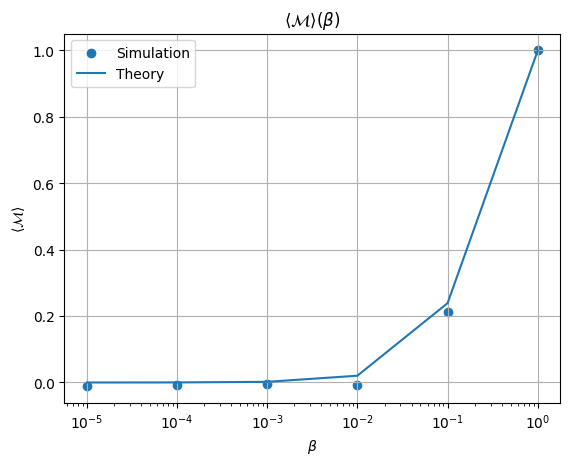

In [98]:
test_n_lattice_sites = 50
test_beta_list = np.array([1e-5, 1e-4, 1e-3, 0.01, 0.1, 1])
test_J = 1
test_h_list = 0
test_n_steps = test_n_lattice_sites * 100

spin_vs_beta = []
for test_beta in test_beta_list:
    average_spin_at_h = metropolis_mc(test_n_steps, test_n_lattice_sites, test_beta, test_J, test_h)
    mean_spin_from_trajectory = np.mean(average_spin_at_h[len(average_spin_at_h)//2:])
    spin_vs_beta.append(mean_spin_from_trajectory)

predicted_spin_v_beta = ising_spin_exact(test_beta_list, test_J, test_h)

plt.scatter(test_beta_list, spin_vs_beta, label='Simulation')
plt.plot(test_beta_list, predicted_spin_v_beta, label='Theory')
plt.title(r'$\langle \mathcal{M} \rangle (\beta)$')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\langle \mathcal{M} \rangle$')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

## Зависимость намагниченности от внешнего поля

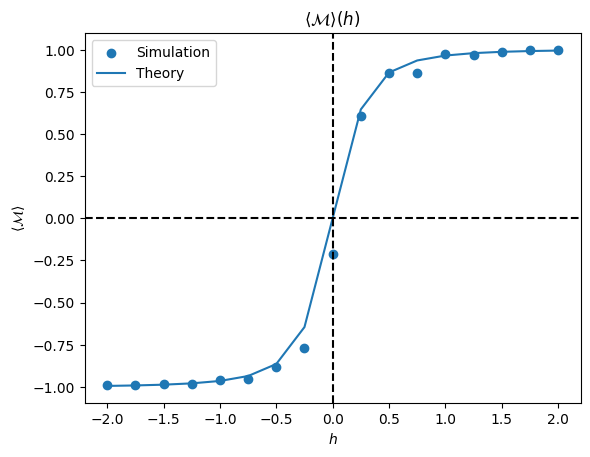

In [96]:
test_n_lattice_sites = 50
test_beta = 0.75
test_J = 1

test_n_steps = test_n_lattice_sites * 100

test_h_list = np.arange(-2, 2.25, 0.25)
spin_vs_h = []
for test_h in test_h_list:
    average_spin_at_h = metropolis_mc(test_n_steps, test_n_lattice_sites, test_beta, test_J, test_h)
    mean_spin_from_trajectory = np.mean(average_spin_at_h[len(average_spin_at_h)//2:])
    spin_vs_h.append(mean_spin_from_trajectory)
    
predicted_spin_v_h = ising_spin_exact(test_beta, test_J, test_h_list)

plt.scatter(test_h_list, spin_vs_h, label='Simulation')
plt.plot(test_h_list, predicted_spin_v_h, label='Theory')
plt.title(r'$\langle \mathcal{M} \rangle (h)$')
plt.xlabel('$h$')
plt.ylabel(r'$\langle \mathcal{M} \rangle$')
plt.axhline(0, linestyle='--', color='black')
plt.axvline(0, linestyle='--', color='black')
plt.legend(loc=0)
plt.show()